# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Load and clean dataset

In [2]:
data = pd.read_csv("Mall_Customers.csv")

print("✅ Dataset loaded!")
print("Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nFirst 5 rows:\n", data.head())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Drop duplicates if any
data = data.drop_duplicates()

✅ Dataset loaded!
Shape: (200, 5)

Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

First 5 rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# EDA and Feature Selection

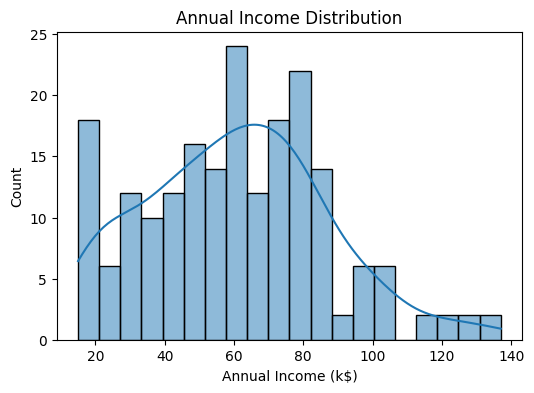

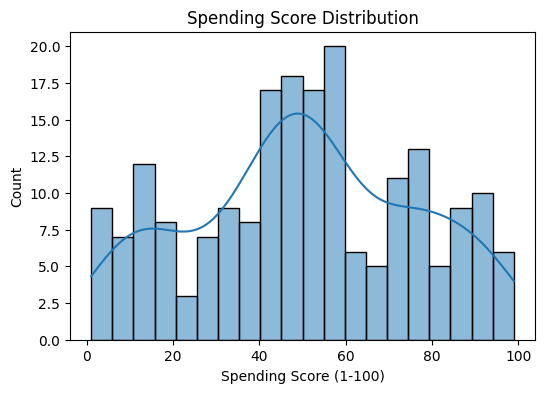

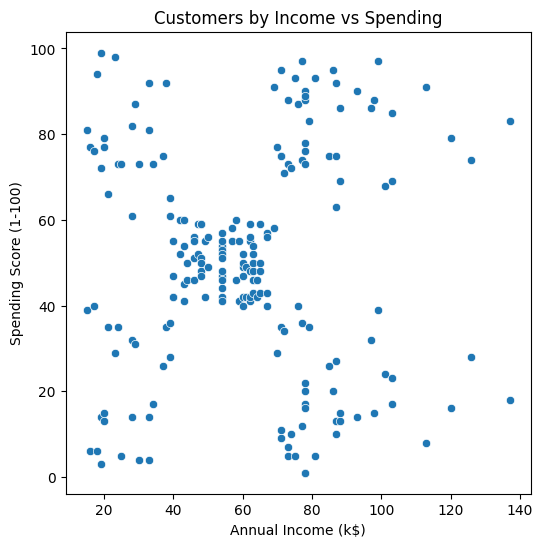

In [3]:
plt.figure(figsize=(6,4))
sns.histplot(data["Annual Income (k$)"], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()

# Scatterplot before clustering
plt.figure(figsize=(6,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=data)
plt.title("Customers by Income vs Spending")
plt.show()

# Feature selection
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow and Silhouette Plots

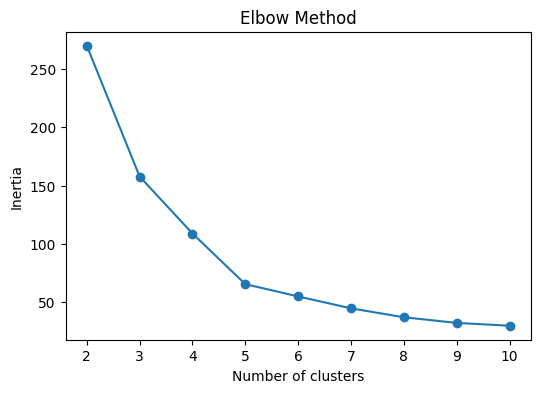

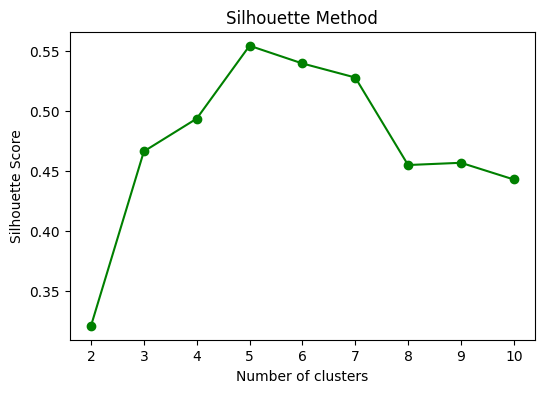

In [4]:
inertia = []
silhouette = []

K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow
plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Plot Silhouette
plt.figure(figsize=(6,4))
plt.plot(K, silhouette, marker="o", color="green")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()


# K-Means Clustering

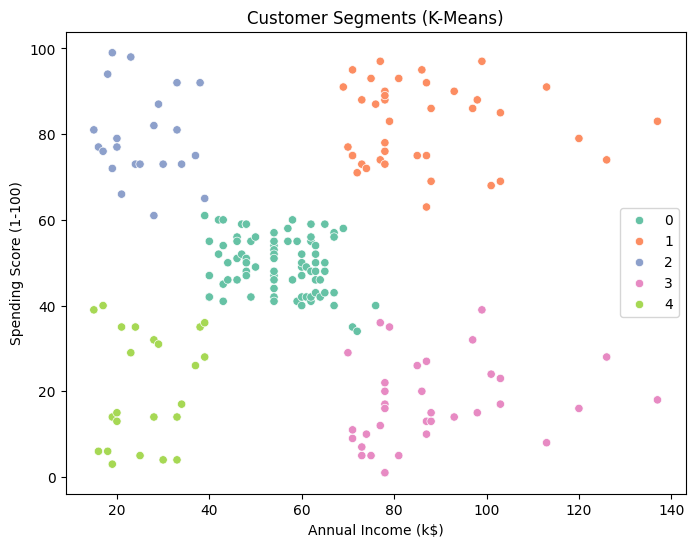

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

data["Cluster"] = clusters

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    data=data
)
plt.title("Customer Segments (K-Means)")
plt.legend()
plt.show()

#  DBSCAN Clustering  (Bonus)

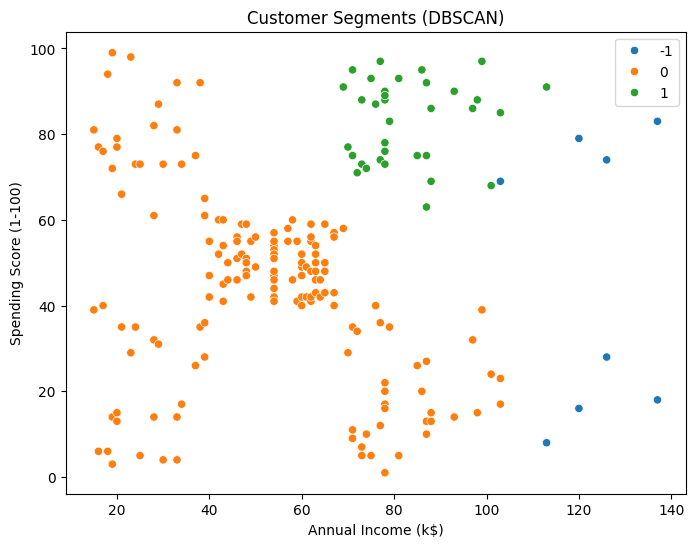

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)

data["DBSCAN_Cluster"] = db_clusters

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="DBSCAN_Cluster",
    palette="tab10",
    data=data
)
plt.title("Customer Segments (DBSCAN)")
plt.legend()
plt.show()

In [7]:

# Analyze Segments
cluster_summary = data.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("Cluster Summary:\n", cluster_summary)

# Save Results
data.to_csv("customer_segments.csv", index=False)
print("✅ Segmentation results saved to customer_segments.csv")

Cluster Summary:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
✅ Segmentation results saved to customer_segments.csv
